In [88]:
import os
import pandas as pd
from IPython.core.display import display
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
def roundup10(x):
    return int(math.ceil(x / 10.0)) * 10


def rounddown10(x):
    return int(math.floor(x / 10.0)) * 10

In [90]:
df = pd.read_csv(os.path.join("data", "human", "data_summary.csv"),
                 index_col=0)
df = df[df.n_ss_done == 14]

df["ratio_leitner"] = df.n_recall_leitner / df.n_eval_leitner
df["ratio_act"] = df.n_recall_act / df.n_eval_act

df.sort_values(by='user', inplace=True)

display(df)

,user,domain,teacher_md,is_item_specific,begin_with_active,first_ss_av_time,last_ss_av_time,n_ss_done,n_eval_leitner,n_recall_leitner,n_eval_act,n_recall_act,ratio_leitner,ratio_act
3,ageratum@active.fi,active.fi,forward,True,True,2020-10-01 12:30:00+03:00,2020-10-07 12:36:40+03:00,14,63.0,60.0,68.0,68.0,0.952381,1.000000
9,armadillo@active.fi,active.fi,forward,True,True,2020-09-30 06:45:00+03:00,2020-10-06 06:51:40+03:00,14,61.0,61.0,74.0,70.0,1.000000,0.945946
12,barracuda@active.fi,active.fi,forward,True,True,2020-09-30 16:00:00+03:00,2020-10-06 16:06:40+03:00,14,48.0,32.0,58.0,44.0,0.666667,0.758621
13,bear@active.fi,active.fi,threshold,True,True,2020-09-30 09:00:00+03:00,2020-10-06 09:06:40+03:00,14,62.0,53.0,111.0,79.0,0.854839,0.711712
14,bee@active.fi,active.fi,forward,True,False,2020-09-30 12:00:00+03:00,2020-10-06 12:06:40+03:00,14,53.0,41.0,42.0,35.0,0.773585,0.833333
15,beetle@active.fi,active.fi,threshold,True,False,2020-09-30 19:00:00+03:00,2020-10-06 19:06:40+03:00,14,48.0,40.0,75.0,39.0,0.833333,0.520000
16,betta@active.fi,active.fi,forward,True,True,2020-09-30 20:00:00+03:00,2020-10-06 20:06:40+03:00,14,57.0,43.0,60.0,52.0,0.754386,0.866667
17,bird@active.fi,active.fi,threshold,True,True,2020-09-30 10:00:00+03:00,2020-10-06 10:06:40+03:00,14,63.0,61.0,141.0,138.0,0.968254,0.978723
18,buffalo@active.fi,active.fi,threshold,True,True,2020-09-30 19:00:00+03:00,2020-10-06 19:06:40+03:00,14,54.0,45.0,83.0,49.0,0.833333,0.590361
19,butterfly@active.fi,active.fi,forward,True,False,2020-09-30 18:00:00+03:00,2020-10-06 18:06:40+03:00,14,63.0,62.0,77.0,76.0,0.984127,0.987013


In [91]:
teacher = "forward"

slc = df.teacher_md == teacher
df_slc = df[slc]
user = df_slc["user"]

x = df_slc["n_recall_leitner"]
y = df_slc["n_recall_act"]

df_plot = pd.DataFrame({"user": user, "leitner": x, teacher: y})
display(df_plot)

,user,leitner,forward
3,ageratum@active.fi,60.0,68.0
9,armadillo@active.fi,61.0,70.0
12,barracuda@active.fi,32.0,44.0
14,bee@active.fi,41.0,35.0
16,betta@active.fi,43.0,52.0
19,butterfly@active.fi,62.0,76.0
21,cat@active.fi,57.0,72.0
22,caterpillar@active.fi,35.0,36.0
24,clownfish@active.fi,52.0,51.0
27,cuckoo@active.fi,56.0,63.0


In [92]:
print(np.mean(df_plot.forward >= df_plot.leitner))

0.44


In [93]:
df_melt = df_plot.melt(id_vars=["user"], value_vars=["leitner", teacher], value_name="n_learnt", var_name="teacher")
display(df_melt)

,user,teacher,n_learnt
0,ageratum@active.fi,leitner,60.0
1,armadillo@active.fi,leitner,61.0
2,barracuda@active.fi,leitner,32.0
3,bee@active.fi,leitner,41.0
4,betta@active.fi,leitner,43.0
5,butterfly@active.fi,leitner,62.0
6,cat@active.fi,leitner,57.0
7,caterpillar@active.fi,leitner,35.0
8,clownfish@active.fi,leitner,52.0
9,cuckoo@active.fi,leitner,56.0


In [94]:
min_leitner = np.min(df.n_recall_leitner)
min_act = np.min(df.n_recall_act)
min_v = np.min((min_leitner, min_act))

max_leitner = np.max(df.n_recall_leitner)
max_act = np.max(df.n_recall_act)
max_v = np.max((max_leitner, max_act))

ylim = (rounddown10(min_v), roundup10(max_v))

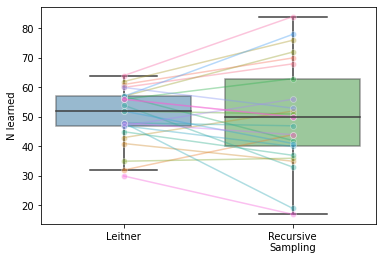

In [103]:
color_dic = {"leitner": "C0", "threshold": "C1", "forward": "C2"}
teacher_names = {"forward": "Recursive\nSampling", "leitner": "Leitner", "threshold": "Myopic"}

fig, ax = plt.subplots() 

order = ["leitner", teacher]
colors = [color_dic[o] for o in order]
ticklabels = [teacher_names[o] for o in order]

sns.boxplot(data=df_melt, x="teacher", y="n_learnt", ax=ax,
            showfliers=False, order=order, palette=colors, boxprops=dict(alpha=.5))
sns.lineplot(data=df_melt,
             x="teacher", y="n_learnt", hue="user", alpha=0.4,
             color="black", ax=ax, legend=False, marker="o")

ax.set_xticklabels(ticklabels)
ax.set_xlabel("")
ax.set_ylabel("N learned")
plt.show()

In [111]:
df_plot["improvment"] = df_plot.forward - df_plot.leitner
print(df_plot.improvment)

3      8.0
9      9.0
12    12.0
14    -6.0
16     9.0
19    14.0
21    15.0
22     1.0
24    -1.0
27     7.0
28   -15.0
31    -8.0
32   -21.0
34    -1.0
36   -29.0
40    -7.0
43   -11.0
44    21.0
46    -7.0
49     9.0
50    -4.0
51    -6.0
54   -13.0
61    -6.0
63    20.0
dtype: float64


<AxesSubplot:xlabel='improvment', ylabel='Count'>

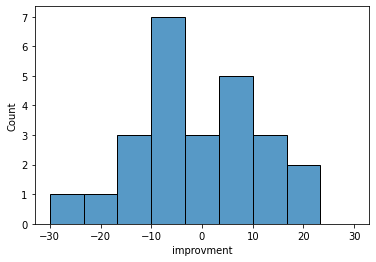

In [118]:
sns.histplot(data=df_plot, x="improvment", bins=np.linspace(-30, 30, 10))

(array([0., 1., 1., 0., 0., 2., 2., 3., 3., 4., 2., 0., 1., 1., 2., 1., 1.,
        1., 0.]),
 array([10.        , 14.21052632, 18.42105263, 22.63157895, 26.84210526,
        31.05263158, 35.26315789, 39.47368421, 43.68421053, 47.89473684,
        52.10526316, 56.31578947, 60.52631579, 64.73684211, 68.94736842,
        73.15789474, 77.36842105, 81.57894737, 85.78947368, 90.        ]),
 <BarContainer object of 19 artists>)

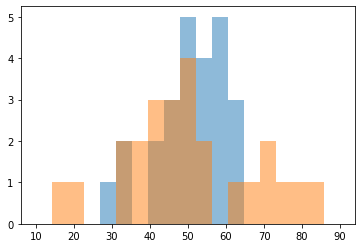

In [121]:
plt.hist(df_plot.leitner, alpha=0.5, color="C0", bins=np.linspace(10, 90, 20))
plt.hist(df_plot.forward, alpha=0.5, color="C1", bins=np.linspace(10, 90, 20))